# Aggregation 📚

### After this session you should be able to 
- apply different aggregation methods to your datasets
- explain in your own words what .groupby() does and apply it to your datasets
- use .groupby() in combination with different methods (including plotting)

In [1]:
import pandas as pd

## 1. Applying aggregation methods: 

In [2]:
df = pd.read_csv("large_countries_2015.csv", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   population  12 non-null     float64
 2   fertility   12 non-null     float64
 3   continent   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


Let's apply some aggregation methods!
Intuition of "aggregation": take some rows, apply some kind of "operation" on them and return a resumed version of these rows.

In [3]:
df.sum()

country       BangladeshBrazilChinaIndiaIndonesiaJapanMexico...
population                                         4504153940.0
fertility                                                 29.25
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

If we apply .sum() to the complete dataframe, strings will be concatenated. 

In [4]:
df["population"].sum()

4504153940.0

In [5]:
df["country"].count()

12

In [6]:
df["country"].value_counts()

Russia           1
China            1
Mexico           1
Indonesia        1
Bangladesh       1
Nigeria          1
India            1
Philippines      1
Japan            1
Pakistan         1
Brazil           1
United States    1
Name: country, dtype: int64

In [7]:
df.describe()

,population,fertility
count,1.200000e+01,12.000000
mean,3.753462e+08,2.437500
std,4.565194e+08,1.200781
min,1.006994e+08,1.450000
25%,1.393470e+08,1.737500
50%,1.855634e+08,2.125000
75%,2.736163e+08,2.567500
max,1.376049e+09,5.890000


Compare this "count" to the usage of the method .count() => we get the same value, only that in .describe() the scientific notation is being used.

In [8]:
df.count()

country       12
population    12
fertility     12
continent     12
dtype: int64

df["population"] = df["population"]/1000, as an option to avoid getting printed out scientific notation.
Another would be to use the syntax
f”{num:.nf}” to represent number ‘num’ in the decimal format up to n decimal places.
Example:

In [9]:
num=2/1250000
print(num)

1.6e-06


In [10]:
output = f"{num:.9f}"
print(output)

0.000001600


In [11]:
# df.describe().transpose()

.agg() can be used to aggregate more "modularly". 
- pass a dictionary in order to define the aggregation function to be applied to selected columns
- pass a list in order to apply selected aggregation functions on all columns at the same time (be aware that applicability of selected functions will depend on the variable type (e.g. apply the mean on a string)).

In [12]:
df.agg(
    {"population":"mean",
    "fertility":"median"
    }
)

population    3.753462e+08
fertility     2.125000e+00
dtype: float64

In [13]:
df.agg(
    ["median","mean","std"]
)

,population,fertility
median,1.855634e+08,2.125000
mean,3.753462e+08,2.437500
std,4.565194e+08,1.200781


Can we apply customized functions to .agg()? It depends on the function:
- if it aggregates, it should work
- if it transforms, it will not be possible to pass it along with aggregation functions at the same time.

In [14]:
def double(x):
    return 2*x

In [15]:
# df.agg(
#     {"population":"mean",
#     "fertility":double
#     }
# )

## 2. .groupby()!

What DOES .groupby() actually do?
1. it **splits** the data
2. it **applies** some kind of operation ON THE GROUPED data
3. it **combines** the data back into a new (pandas) object (i.e. series or dataframe)

In [16]:
g = df.groupby("continent") # defining the "criterion/group/index" by which we want to group the data.

In [17]:
type(g) # note the "groupby"-object.

pandas.core.groupby.generic.DataFrameGroupBy

In [18]:
for continents, group in g:
    print(continents),
    print(group),
    print("\n")


Africa
   country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa


Asia
       country    population  fertility continent
0   Bangladesh  1.609956e+08       2.12      Asia
2        China  1.376049e+09       1.57      Asia
3        India  1.311051e+09       2.43      Asia
4    Indonesia  2.575638e+08       2.28      Asia
5        Japan  1.265735e+08       1.45      Asia
8     Pakistan  1.889249e+08       3.04      Asia
9  Philippines  1.006994e+08       2.98      Asia


Europe
   country   population  fertility continent
10  Russia  143456918.0       1.61    Europe


North America
          country   population  fertility      continent
6          Mexico  127017224.0       2.13  North America
11  United States  321773631.0       1.97  North America


South America
  country   population  fertility      continent
1  Brazil  207847528.0       1.78  South America




In [19]:
g.get_group("Asia") # we could extract specific groups created by .groupby()

,country,population,fertility,continent
0,Bangladesh,1.609956e+08,2.12,Asia
2,China,1.376049e+09,1.57,Asia
3,India,1.311051e+09,2.43,Asia
4,Indonesia,2.575638e+08,2.28,Asia
5,Japan,1.265735e+08,1.45,Asia
8,Pakistan,1.889249e+08,3.04,Asia
9,Philippines,1.006994e+08,2.98,Asia


<AxesSubplot:ylabel='continent'>

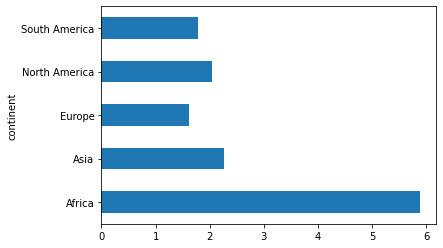

In [20]:
g["fertility"].mean().plot.barh() # recurrent usafe of .groupby(): for plotting!

In [21]:
g2 = df.groupby(["continent", "country"]) # more usual notation of .groupby()...in addition: pass more than one "index" to be grouped by.

In [22]:
g2["fertility", "population"].mean() # pass more than one column which will be filtered in each(!) group. After that: apply aggregation method 
# (in this case: .mean())

<ipython-input-22-34ef4365d486>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g2["fertility", "population"].mean() # pass more than one column which will be filtered in each(!) group. After that: apply aggregation method


fertility    population
continent     country                               
Africa        Nigeria             5.89  1.822020e+08
Asia          Bangladesh          2.12  1.609956e+08
              China               1.57  1.376049e+09
              India               2.43  1.311051e+09
              Indonesia           2.28  2.575638e+08
              Japan               1.45  1.265735e+08
              Pakistan            3.04  1.889249e+08
              Philippines         2.98  1.006994e+08
Europe        Russia              1.61  1.434569e+08
North America Mexico              2.13  1.270172e+08
              United States       1.97  3.217736e+08
South America Brazil              1.78  2.078475e+08

In [23]:
for continent, group in g2:
    print(continent),
    print(group),
    print("\n")

('Africa', 'Nigeria')
   country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa


('Asia', 'Bangladesh')
      country   population  fertility continent
0  Bangladesh  160995642.0       2.12      Asia


('Asia', 'China')
  country    population  fertility continent
2   China  1.376049e+09       1.57      Asia


('Asia', 'India')
  country    population  fertility continent
3   India  1.311051e+09       2.43      Asia


('Asia', 'Indonesia')
     country   population  fertility continent
4  Indonesia  257563815.0       2.28      Asia


('Asia', 'Japan')
  country   population  fertility continent
5   Japan  126573481.0       1.45      Asia


('Asia', 'Pakistan')
    country   population  fertility continent
8  Pakistan  188924874.0       3.04      Asia


('Asia', 'Philippines')
       country   population  fertility continent
9  Philippines  100699395.0       2.98      Asia


('Europe', 'Russia')
   country   population  fertility continent
10  Russia  14

In [24]:
g2[["population"]].mean()  # we can get our output returned as a dataframe as well (optional!). Otherwise. This would return a series.

population
continent     country                    
Africa        Nigeria        1.822020e+08
Asia          Bangladesh     1.609956e+08
              China          1.376049e+09
              India          1.311051e+09
              Indonesia      2.575638e+08
              Japan          1.265735e+08
              Pakistan       1.889249e+08
              Philippines    1.006994e+08
Europe        Russia         1.434569e+08
North America Mexico         1.270172e+08
              United States  3.217736e+08
South America Brazil         2.078475e+08

In [25]:
g2.agg(
   {"population":"mean",
   "fertility":double
    }
)

population  fertility
continent     country                               
Africa        Nigeria        1.822020e+08      11.78
Asia          Bangladesh     1.609956e+08       4.24
              China          1.376049e+09       3.14
              India          1.311051e+09       4.86
              Indonesia      2.575638e+08       4.56
              Japan          1.265735e+08       2.90
              Pakistan       1.889249e+08       6.08
              Philippines    1.006994e+08       5.96
Europe        Russia         1.434569e+08       3.22
North America Mexico         1.270172e+08       4.26
              United States  3.217736e+08       3.94
South America Brazil         2.078475e+08       3.56

After grouping, we can now "mix" between aggregations and transformations, combining .groupby() with .agg() and our customized functin from above.

In [26]:
g3 = df.groupby(["country", "continent"])["population"].agg(["min", "median", double]) 
g3

,,min,median,double
country,continent,,,
Bangladesh,Asia,1.609956e+08,1.609956e+08,3.219913e+08
Brazil,South America,2.078475e+08,2.078475e+08,4.156951e+08
China,Asia,1.376049e+09,1.376049e+09,2.752098e+09
India,Asia,1.311051e+09,1.311051e+09,2.622101e+09
Indonesia,Asia,2.575638e+08,2.575638e+08,5.151276e+08
Japan,Asia,1.265735e+08,1.265735e+08,2.531470e+08
Mexico,North America,1.270172e+08,1.270172e+08,2.540344e+08
Nigeria,Africa,1.822020e+08,1.822020e+08,3.644039e+08
Pakistan,Asia,1.889249e+08,1.889249e+08,3.778497e+08


In [27]:
g4 = df.groupby("country").transform(double)   # applying .transform() on all(!) our initial dataframe
g4

,population,fertility,continent
0,3.219913e+08,4.24,AsiaAsia
1,4.156951e+08,3.56,South AmericaSouth America
2,2.752098e+09,3.14,AsiaAsia
3,2.622101e+09,4.86,AsiaAsia
4,5.151276e+08,4.56,AsiaAsia
5,2.531470e+08,2.90,AsiaAsia
6,2.540344e+08,4.26,North AmericaNorth America
7,3.644039e+08,11.78,AfricaAfrica
8,3.778497e+08,6.08,AsiaAsia
9,2.013988e+08,5.96,AsiaAsia


In [28]:
g5 = df.groupby("country")["population", "fertility"].transform(double) # applying .transform() on some of the cols of our initial dataframe. 
g5

<ipython-input-28-f886edae1374>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g5 = df.groupby("country")["population", "fertility"].transform(double) # applying .transform() on some of the cols of our initial dataframe.


,population,fertility
0,3.219913e+08,4.24
1,4.156951e+08,3.56
2,2.752098e+09,3.14
3,2.622101e+09,4.86
4,5.151276e+08,4.56
5,2.531470e+08,2.90
6,2.540344e+08,4.26
7,3.644039e+08,11.78
8,3.778497e+08,6.08
9,2.013988e+08,5.96


In [29]:
g1 = df.groupby('continent') 
g1.groups.keys()  # returns the keys of a dictionary...alternatively: use 

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'South America'])

In [30]:
g4 = df.groupby(len) # passing a function to .groupby(). Examples for usage pending!
g4.groups

TypeError: object of type 'int' has no len()